# Genero los graficos relacionados con las postulaciones

In [2]:
%matplotlib inline

import pandas as pd
import matplotlib as plt
import numpy as np
import calendar
import pyspark

#### Cargo los archivos a utilizar

In [3]:
postulaciones = pd.read_csv('Sources/fiuba_4_postulaciones.csv')
avisos = pd.read_csv('Sources/fiuba_6_avisos_detalle.csv')

In [4]:
postulaciones.head()

,idaviso,idpostulante,fechapostulacion
0,1112257047,NM5M,2018-01-15 16:22:34
1,1111920714,NM5M,2018-02-06 09:04:50
2,1112346945,NM5M,2018-02-22 09:04:47
3,1112345547,NM5M,2018-02-22 09:04:59
4,1112237522,5awk,2018-01-25 18:55:03


In [5]:
postulaciones["fechapostulacion"] = postulaciones["fechapostulacion"].astype("datetime64")
fechas = postulaciones['fechapostulacion']
df_fechas = pd.DataFrame({'dia':fechas.dt.day,'mes':fechas.dt.month})

/anaconda3/lib/python3.6/site-packages/pandas/core/internals.py:3462: FutureWarning: Passing in 'datetime64' dtype with no frequency is deprecated and will raise in a future version. Please pass in 'datetime64[ns]' instead.
  return self.apply('astype', dtype=dtype, **kwargs)


#### Grafico de las postulaciones

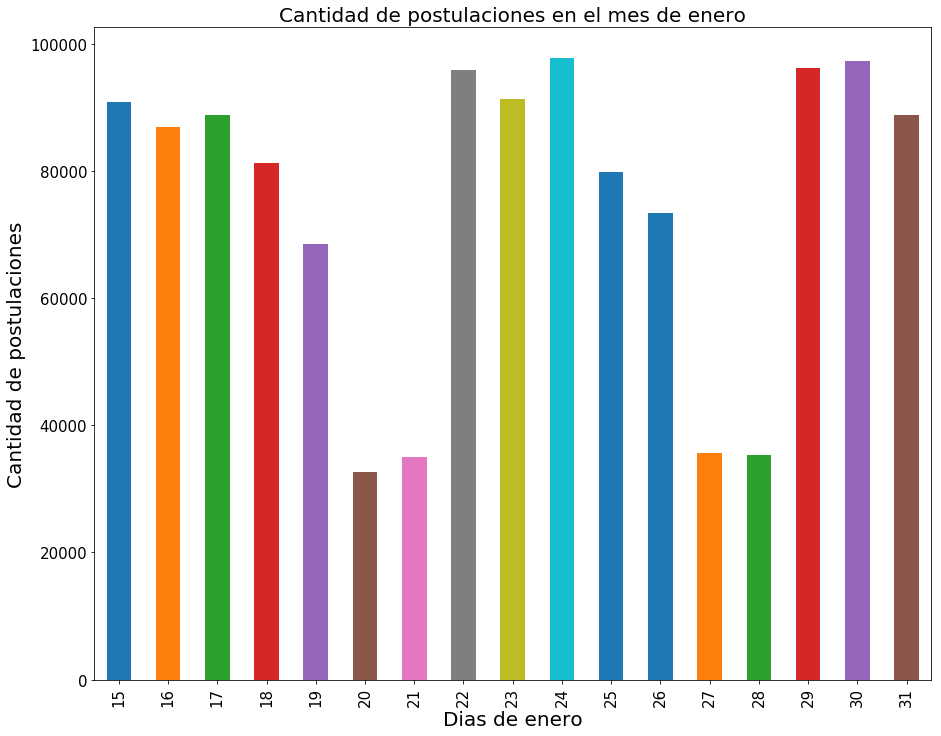

In [8]:
plt = df_fechas.groupby('mes').get_group(1)['dia'].value_counts().sort_index().plot.bar(figsize=(15,12))
plt.set_title('Cantidad de postulaciones en el mes de enero', size=20)
plt.set_xlabel('Dias de enero', size=20)
plt.set_ylabel('Cantidad de postulaciones', size=20)
plt.tick_params('both',labelsize=15)

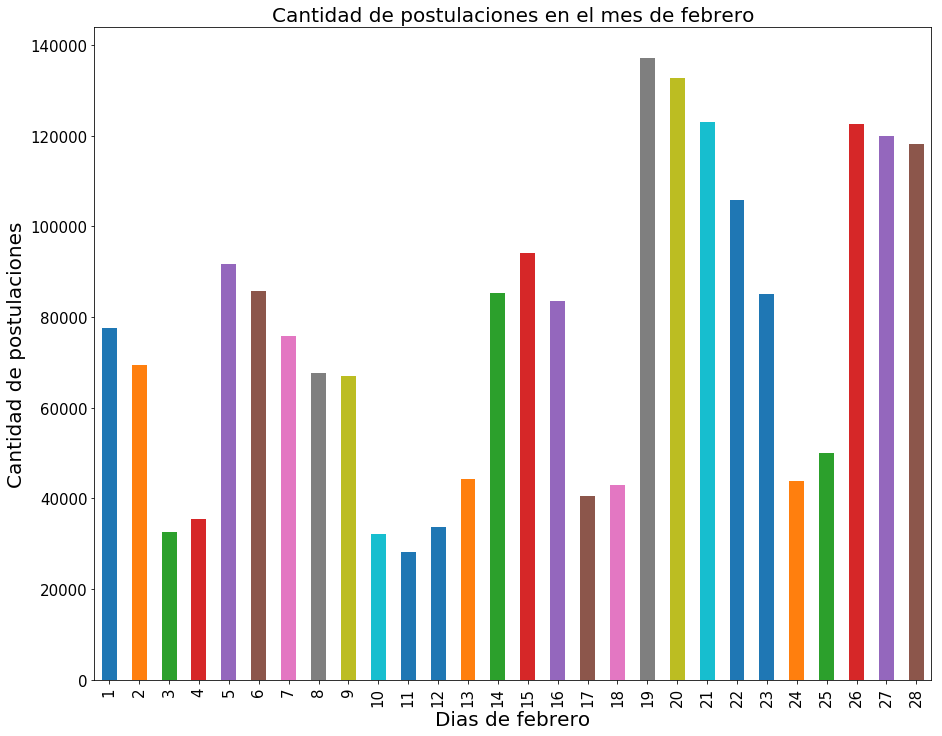

In [9]:
plt = df_fechas.groupby('mes').get_group(2)['dia'].value_counts().sort_index().plot.bar(figsize=(15,12))
plt.set_title('Cantidad de postulaciones en el mes de febrero', size=20)
plt.set_xlabel('Dias de febrero', size=20)
plt.set_ylabel('Cantidad de postulaciones', size=20)
plt.tick_params('both',labelsize=15)

#### Cantidad de postulaciones por dia de la semana

In [11]:
aux = fechas.apply(pd.datetime.weekday)


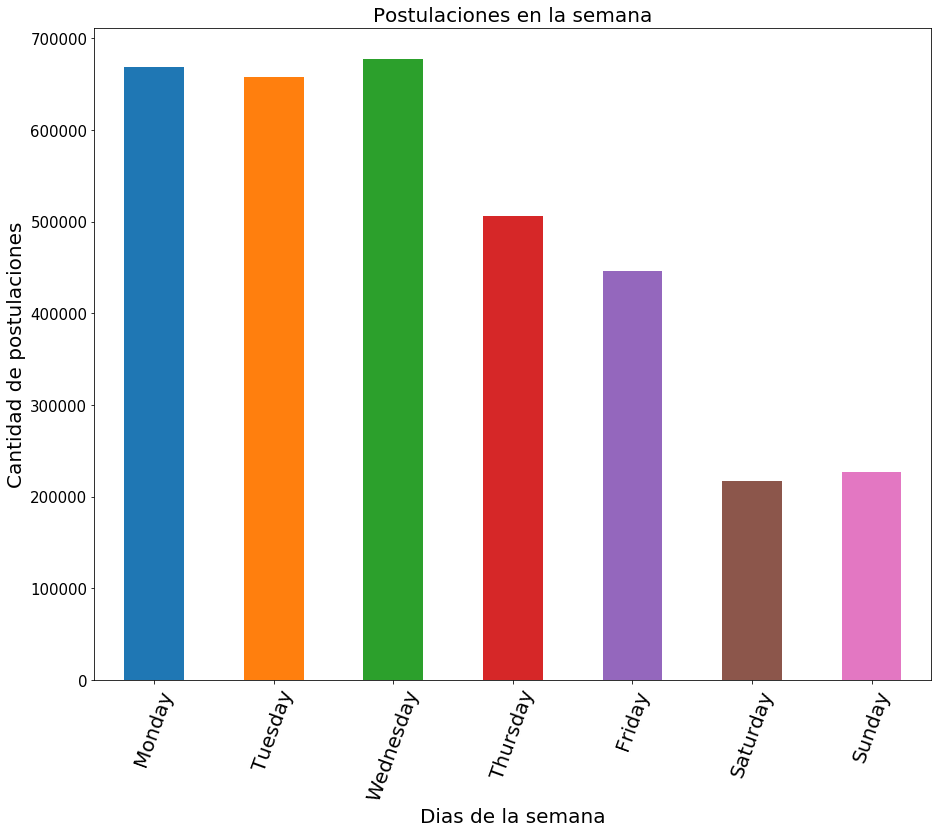

In [12]:
plt = aux.value_counts().sort_index().plot.bar(figsize = (15,12))
plt.set_title('Postulaciones en la semana', size=20)
plt.set_xlabel('Dias de la semana', size=20)
plt.set_ylabel('Cantidad de postulaciones', size=20)
plt.set_xticks(np.arange(0,7))
plt.set_xticklabels(calendar.day_name[0:7])
plt.tick_params(axis='x', labelrotation=70, labelsize=20)
plt.tick_params('y', labelsize=15)

#### Cantidad de postulaciones en el periodo

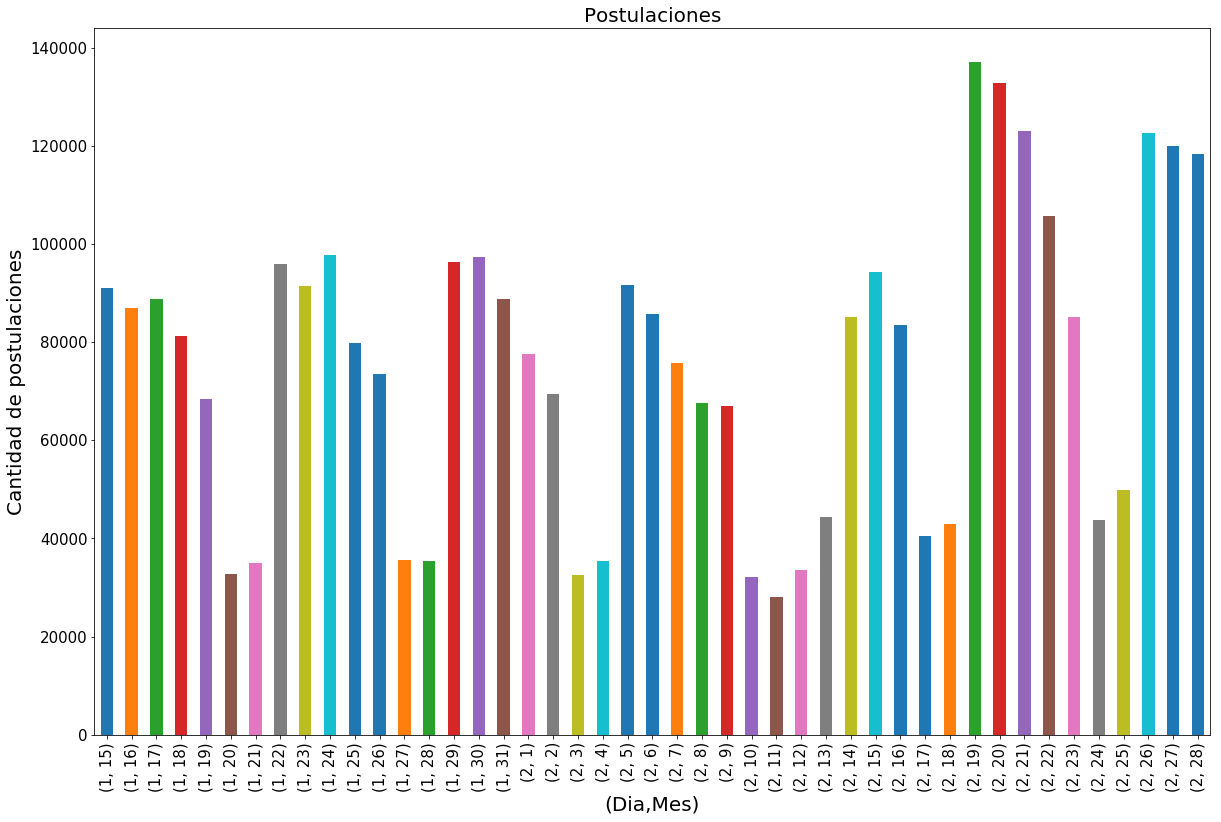

In [9]:
plt = df_fechas.groupby(['mes', 'dia']).size().plot.bar(figsize=(20,13))
plt.set_title('Postulaciones', size=20)
plt.set_xlabel('(Mes,Dia)', size=20)
plt.set_ylabel('Cantidad de postulaciones', size=20)
plt.tick_params('both', labelsize=15)

#### Avisos mas postulados

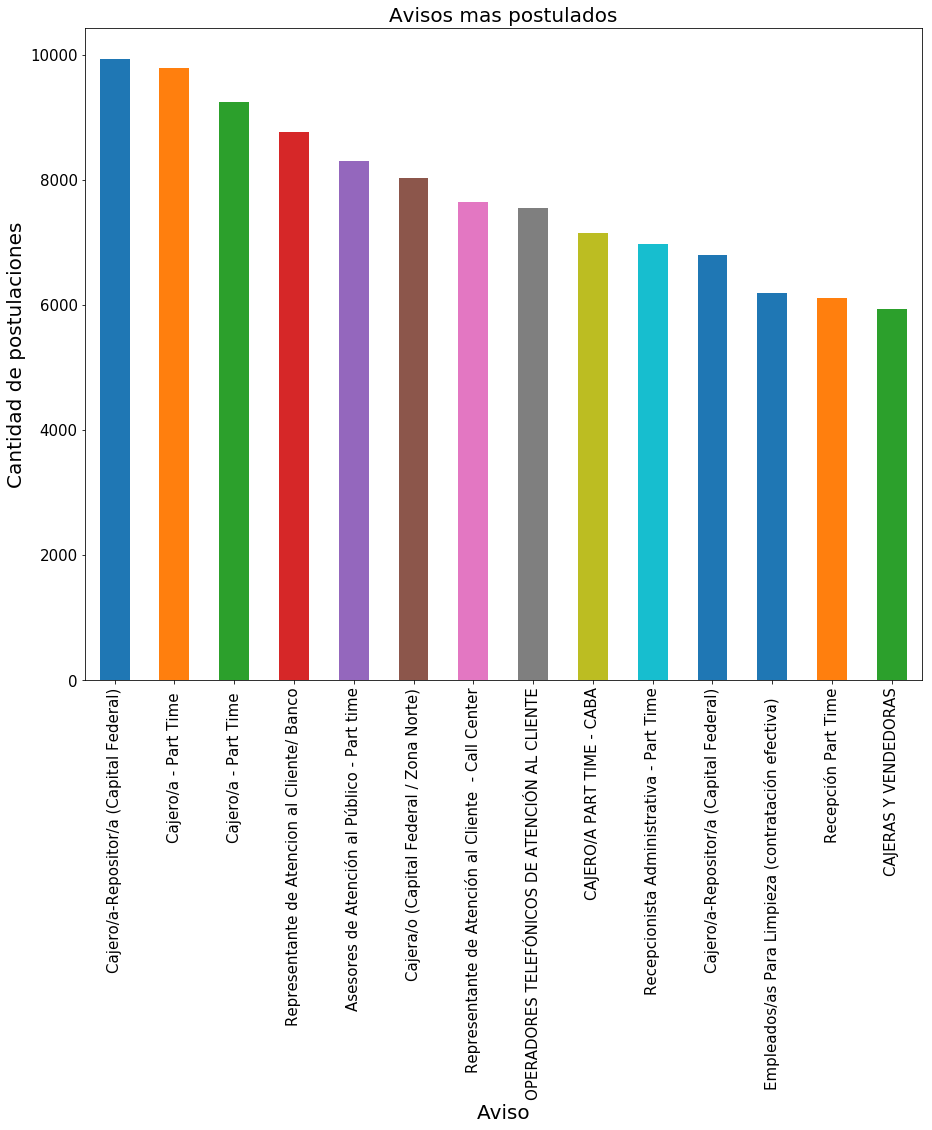

In [13]:
aux = postulaciones['idaviso'].value_counts()[:14]
aux = aux.rename(lambda x: avisos.set_index('idaviso').loc[x,'titulo'])
plt = aux.plot.bar(figsize=(15,12))
plt.set_title('Avisos mas postulados', size=20)
plt.set_xlabel('Aviso', size=20)
plt.set_ylabel('Cantidad de postulaciones', size=20)
plt.tick_params('y', labelsize=15)
plt.tick_params('x', labelsize=15)